<a href="https://colab.research.google.com/github/TranThaiAn19146304/FINALPROJECT/blob/main/nhandien_linhkien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**B1: THEM THU VIEN CAN THIET**

In [ ]:
#thêm một số thư viện cần thiết
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

**B2: VIET HAM CON DE XEM DO THI**

In [ ]:
#thêm hàm con để vẽ đồ thị
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')

  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

**B3: LAY DATA**

In [ ]:
sl = 23

# Load Data 
with open('/content/drive/MyDrive/project_AI/data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)


# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, sl)
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)
x_train.shape


(1150, 150, 150, 3)

**B4: TAO MODEL** 

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(sl, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

**B5: TRAINING MODEL**

In [ ]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 100, batch_size = 64, validation_split = 0.3)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
13/13 [==============================] - 18s 352ms/step - loss: 3.1998 - acc: 0.0385 - val_loss: 3.1381 - val_acc: 0.0290
Epoch 2/100
13/13 [==============================] - 2s 150ms/step - loss: 3.1330 - acc: 0.0509 - val_loss: 3.1207 - val_acc: 0.0290
Epoch 3/100
13/13 [==============================] - 2s 146ms/step - loss: 3.0717 - acc: 0.0547 - val_loss: 2.9785 - val_acc: 0.0725
Epoch 4/100
13/13 [==============================] - 2s 160ms/step - loss: 2.8710 - acc: 0.0832 - val_loss: 2.8095 - val_acc: 0.0870
Epoch 5/100
13/13 [==============================] - 2s 156ms/step - loss: 2.7126 - acc: 0.1366 - val_loss: 2.6891 - val_acc: 0.1420
Epoch 6/100
13/13 [==============================] - 2s 147ms/step - loss: 2.6068 - acc: 0.1602 - val_loss: 2.4880 - val_acc: 0.1797
Epoch 7/100
13/13 [==============================] - 2s 147ms/step - loss: 2.3665 - acc: 0.2186 - val_loss: 2.5546 - val_acc: 0.1884
Epoch 8/100
13/13 [==============================] - 2s 147ms/step -

**B6: KIEM TRA MODEL**

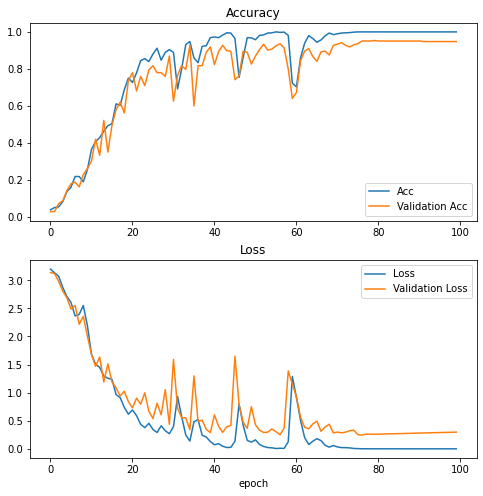

In [ ]:
plot_history(his)

**B7: LUU MODEL**

In [ ]:
model.save("/content/drive/MyDrive/project_AI/model_v2.h5")